In [1]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
filepath = 'hate_crime.csv'
df = pd.read_csv(filepath, low_memory=False)
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [3]:
filtered_df = df[['DATA_YEAR', 'STATE_ABBR', 'OFFENDER_RACE', 'VICTIM_TYPES', 'BIAS_DESC', 
                  'VICTIM_COUNT', 'TOTAL_OFFENDER_COUNT']]
filtered_df.head()

,DATA_YEAR,STATE_ABBR,OFFENDER_RACE,VICTIM_TYPES,BIAS_DESC,VICTIM_COUNT,TOTAL_OFFENDER_COUNT
0,1991,AR,White,Individual,Anti-Black or African American,1,1
1,1991,AR,Black or African American,Individual,Anti-White,1,1
2,1991,AR,Black or African American,Individual,Anti-Black or African American,1,1
3,1991,AR,Black or African American,Individual,Anti-White,2,1
4,1991,AR,Black or African American,Individual,Anti-White,1,1


In [4]:
years_df = filtered_df[(filtered_df['DATA_YEAR'] >= 2014) & (df['DATA_YEAR'] <= 2018)]
years_df

,DATA_YEAR,STATE_ABBR,OFFENDER_RACE,VICTIM_TYPES,BIAS_DESC,VICTIM_COUNT,TOTAL_OFFENDER_COUNT
169146,2014,AK,Unknown,Individual,Anti-Gay (Male),2,0
169147,2014,AK,White,Individual,Anti-American Indian or Alaska Native,1,2
169148,2014,AK,White,Individual,Anti-Black or African American,1,1
169149,2014,AK,Black or African American,Individual,Anti-American Indian or Alaska Native,2,2
169150,2014,AK,White,Individual,Anti-American Indian or Alaska Native,1,2
...,...,...,...,...,...,...,...
201398,2018,WV,Unknown,Individual,Anti-Black or African American,1,0
201399,2018,WV,White,Individual,Anti-Black or African American,1,1
201400,2018,WV,Unknown,Individual,Anti-Asian,1,0
201401,2018,WV,White,Law Enforcement Officer,Anti-White,1,1


In [5]:
total_df = years_df['BIAS_DESC'].value_counts()
total_df = pd.DataFrame(total_df).head()
total_df.rename(columns={'BIAS_DESC':'Total'}, inplace=True)
total_df

,Total
Anti-Black or African American,9176
Anti-Jewish,3779
Anti-White,3473
Anti-Gay (Male),3394
Anti-Hispanic or Latino,1879


In [6]:
bias14 = years_df.loc[years_df['DATA_YEAR'] == 2014,:]['BIAS_DESC'].value_counts()
bias14 = pd.DataFrame(bias14)
bias14.rename(columns={'BIAS_DESC':'2014'}, inplace=True)
bias14_df = bias14.loc[bias14['2014']>=300]
bias14_df

,2014
Anti-Black or African American,1647
Anti-Jewish,613
Anti-Gay (Male),612
Anti-White,610
Anti-Other Race/Ethnicity/Ancestry,346
Anti-Hispanic or Latino,306


In [7]:
bias15 = years_df.loc[years_df['DATA_YEAR'] == 2015,:]['BIAS_DESC'].value_counts()
bias15 = pd.DataFrame(bias15)
bias15.rename(columns={'BIAS_DESC':'2015'}, inplace=True)
bias15_df = bias15.loc[bias15['2015']>=300]
bias15_df

,2015
Anti-Black or African American,1759
Anti-Gay (Male),677
Anti-Jewish,668
Anti-White,615
Anti-Hispanic or Latino,301


In [8]:
bias16 = years_df.loc[years_df['DATA_YEAR'] == 2016,:]['BIAS_DESC'].value_counts()
bias16 = pd.DataFrame(bias16)
bias16.rename(columns={'BIAS_DESC':'2016'}, inplace=True)
bias16_df = bias16.loc[bias16['2016']>=300]
bias16_df

,2016
Anti-Black or African American,1770
Anti-White,738
Anti-Gay (Male),689
Anti-Jewish,689
Anti-Hispanic or Latino,347
Anti-Islamic (Muslim),309


In [9]:
bias17 = years_df.loc[years_df['DATA_YEAR'] == 2017,:]['BIAS_DESC'].value_counts()
bias17 = pd.DataFrame(bias17)
bias17.rename(columns={'BIAS_DESC':'2017'}, inplace=True)
bias17_df = bias17.loc[bias17['2017']>=300]
bias17_df

,2017
Anti-Black or African American,2059
Anti-Jewish,957
Anti-White,709
Anti-Gay (Male),676
Anti-Hispanic or Latino,433


In [10]:
bias18 = years_df.loc[years_df['DATA_YEAR'] == 2018,:]['BIAS_DESC'].value_counts()
bias18 = pd.DataFrame(bias18)
bias18.rename(columns={'BIAS_DESC':'2018'}, inplace=True)
bias18_df = bias18.loc[bias18['2018']>=300]
bias18_df

,2018
Anti-Black or African American,1941
Anti-Jewish,852
Anti-White,801
Anti-Gay (Male),740
Anti-Hispanic or Latino,492
"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",302


In [11]:
updtd_df = pd.concat([total_df, bias14_df, bias15_df, bias16_df, bias17_df, bias18_df], axis=1)
chart_df = updtd_df.dropna().reset_index().rename(columns={'index':'Bias Desc'})
chart_df

,Bias Desc,Total,2014,2015,2016,2017,2018
0,Anti-Black or African American,9176.0,1647.0,1759.0,1770.0,2059.0,1941.0
1,Anti-Jewish,3779.0,613.0,668.0,689.0,957.0,852.0
2,Anti-White,3473.0,610.0,615.0,738.0,709.0,801.0
3,Anti-Gay (Male),3394.0,612.0,677.0,689.0,676.0,740.0
4,Anti-Hispanic or Latino,1879.0,306.0,301.0,347.0,433.0,492.0


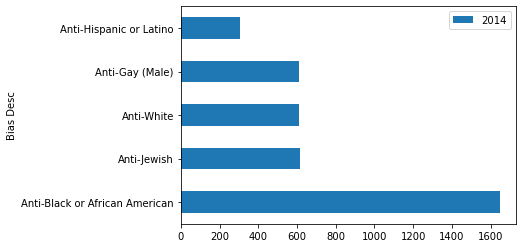

In [12]:
# Generate a bar plot
chart14 = chart_df.plot.barh(x='Bias Desc', y='2014')

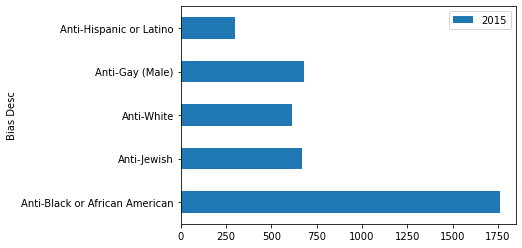

In [13]:
# Generate a bar plot
chart15 = chart_df.plot.barh(x='Bias Desc', y='2015')

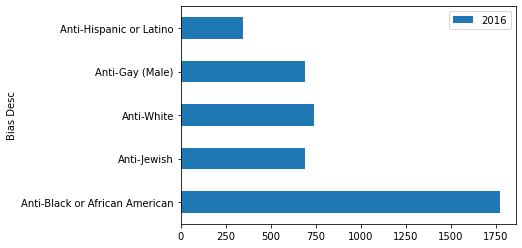

In [14]:
# Generate a bar plot
chart16 = chart_df.plot.barh(x='Bias Desc', y='2016')

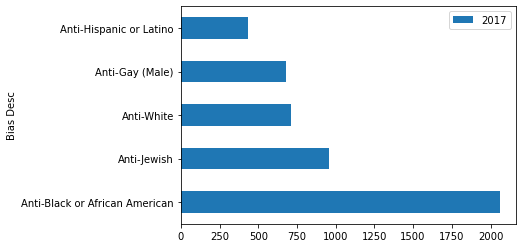

In [15]:
# Generate a bar plot
chart17 = chart_df.plot.barh(x='Bias Desc', y='2017')

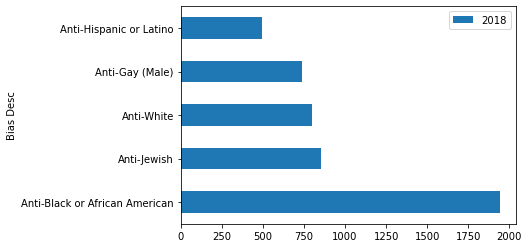

In [16]:
# Generate a bar plot
chart18 = chart_df.plot.barh(x='Bias Desc', y='2018')

In [17]:
per_change1 = (((chart_df['2015']) - (chart_df['2014'])) / (chart_df['2014'])).round(3)
per_change2 = (((chart_df['2016']) - (chart_df['2015'])) / (chart_df['2015'])).round(3)
per_change3 = (((chart_df['2017']) - (chart_df['2016'])) / (chart_df['2016'])).round(3)
per_change4 = (((chart_df['2018']) - (chart_df['2017'])) / (chart_df['2017'])).round(3)

change_df = {
    "% chg 14 to 15":per_change1,
    "% chg 15 to 16":per_change2,
    "% chg 16 to 17":per_change3,
    "% chg 17 to 18":per_change4
}
change_df = pd.DataFrame(change_df, columns=change_df.keys())
change_chart = change_df.set_index((chart_df['Bias Desc'])).style.format('{:.2%}')
change_chart

,% chg 14 to 15,% chg 15 to 16,% chg 16 to 17,% chg 17 to 18
Bias Desc,,,,
Anti-Black or African American,6.80%,0.60%,16.30%,-5.70%
Anti-Jewish,9.00%,3.10%,38.90%,-11.00%
Anti-White,0.80%,20.00%,-3.90%,13.00%
Anti-Gay (Male),10.60%,1.80%,-1.90%,9.50%
Anti-Hispanic or Latino,-1.60%,15.30%,24.80%,13.60%
